In [1]:
#linear regression
# y=b1+b2*x
# b1-intercept
# b2-coefficient
#relation between two varaiables by fitting a line

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [3]:
#load data
path="oil_exxon.xlsx"
pricedata=pd.read_excel(path)

# making date as index
# index of pricedata ko change karna hai
pricedata.index=pd.to_datetime(pricedata["date"])
pricedata=pricedata.drop(["date"],axis=1) 
# 1 means column axis
pricedata.head()


,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


# check the data types

In [4]:
pricedata.dtypes
# ok ok

exon_price    float64
oil_price     float64
dtype: object

In [5]:
# defining the new names
# change by dictionary
newcolumnnames={"exon_price":"exxonprice"}
pricedata=pricedata.rename(columns=newcolumnnames)
pricedata.head()

,exxonprice,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


# handling missing values

In [6]:
# fill Nan or drop them
pricedata.isna().any()
# false means no missing values

# lets drop that row
# rows with missing values will get deleted
pricedata=pricedata.dropna()

In [7]:
pricedata.isna().any()
# now no missing values

exxonprice    False
oil_price     False
dtype: bool

# explore data

In [8]:
# how data is distributed
# is there any appearing the relationsip between the two vraiables
# are there any outliers
# is data skewed

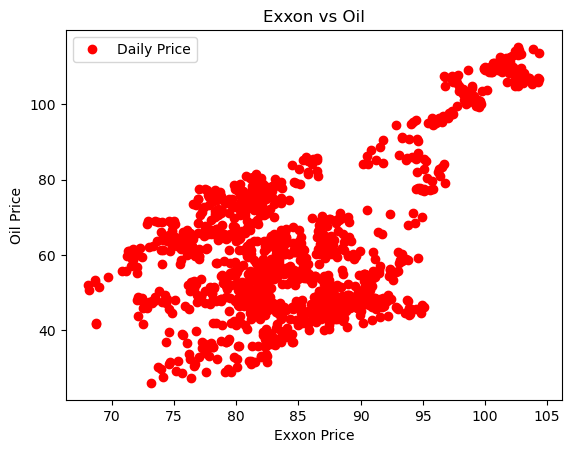

In [9]:
# //scatter plot for relationship finding
x=pricedata["exxonprice"]
y=pricedata["oil_price"]
# //creation fo scatter plot
plt.plot(x,y,'o',color="red",label="Daily Price")
# formatting of scatter plot
plt.title("Exxon vs Oil")
plt.xlabel("Exxon Price")
plt.ylabel("Oil Price")
plt.legend()
plt.show()

In [10]:
# looks positive coorellation so lets emasure this relation
pricedata.corr()
# >0.8 very strong relation
# >0.6 strong relation
# 0.45 moderate relation
# 0.25 weak relation

,exxonprice,oil_price
exxonprice,1.00000,0.60132
oil_price,0.60132,1.00000


In [11]:
pricedata.describe()

,exxonprice,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


In [12]:
# we can see that 75% values falls under standard deviation so good data

# checking for skewness and outliers

In [13]:
# we dont want outliers and also not skewed data as impact the model training
# //so lets draw the histogram
# //+ve skewed (symmetry)means +ve ki taraf extended hai
#+ve kurtosis means data is highly tailed than normal distribution maximam=>LeptoKurtic
#-ve kurtosis means data is lower tailed than normal distribution maximam=>PlatyKurtic

array([[<AxesSubplot:title={'center':'exxonprice'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

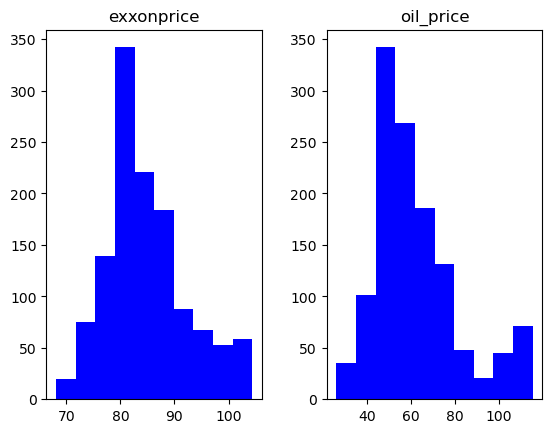

In [14]:
pricedata.hist(grid=False,color="blue")
# //grid false means cells linings nahi rahenge

In [15]:
# slightely skwed to right
# //calculating kurtosis and skewed

# //excess kurtosis by using fisher method, 
# regular kurtosis can be calculated by regular kurtosis
exxon_kurtosis=kurtosis(pricedata['exxonprice'],fisher=True)
oil_kurtosis=kurtosis(pricedata['oil_price'],fisher=True)

# //skewness calculation
exxon_skew=skew(pricedata['exxonprice'])
oil_skew=skew(pricedata['oil_price'])

display("Exxon kurtosis : {:2}".format(exxon_kurtosis))
display("Oil kurtosis : {:2}".format(oil_kurtosis))
display("Exxon Skew : {:2}".format(exxon_skew))
display("Exxon Skew : {:2}".format(oil_skew))

# //here we can see that oil is rightly skewed so we need may to apply some trasnformation

'Exxon kurtosis : 0.08838507514930338'

'Oil kurtosis : 0.5321055130944878'

'Exxon Skew : 0.66024881165324'

'Exxon Skew : 1.024326574686099'

In [16]:
# Kurtosis

# Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
# Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
# Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

# Skewness

# If skewness is less than −1 or greater than +1, the distribution is highly skewed.
# If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
# If skewness is between −½ and +½, the distribution is approximately symmetric.

# Hypothesis testing

In [17]:
# kurtosis and skewtest for checking data is  normally distributted
display("Exxon")
display(stats.kurtosistest(pricedata['exxonprice']))
display("Oil")
display(stats.kurtosistest(pricedata['oil_price']))
# //skewtest
display("Exxon")
display(stats.skewtest(pricedata['exxonprice']))
display("Oil")
display(stats.skewtest(pricedata['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)

# Build the model

# split the data

In [18]:
# variable defining
# //our output varaibale is exxon price
Y=pricedata.drop(["oil_price"],axis=1)
X=pricedata[["oil_price"]]

# split the data
# pahle first varaible then second varaible
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
# //random state 1 means every time break the data in 80:20% ratio and use

# create and fit the model

In [19]:
# //instance
lrmodel=LinearRegression()
# //training
lrmodel.fit(X_train,Y_train)

LinearRegression()

In [20]:
# //explore the output so lets know the slope and intercept

In [21]:
intercept=lrmodel.intercept_[0]
coefficient=lrmodel.coef_[0][0]

print("Coefficient: {:.3}".format(coefficient))
print("intercept: {:.3}".format(intercept))

Coefficient: 0.229
intercept: 70.5


In [22]:
# coefficeint means single unit increase in oil 
# results in 0.229 increase in exxon price

# //lets take a single prediction

In [23]:
prediction=lrmodel.predict([[55.23]])
prediction_coef=prediction[0][0]
print("Predicted coeff : {:.3}".format(prediction_coef))

Predicted coeff : 83.2


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# multiple predictions

In [24]:
ypred=lrmodel.predict(X_test)
ypred[:5]
# //last 5 prices

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

# Evaluting the model

In [27]:
# # building the model from statsmodel library and will 
# # compare with the output with skelarn mdodels

# # //definiing the input
# x2=sm.add_constant(X)
# # // create a OLS model
# model=sm.OLS(Y,x2)

# # //fit the data
# est=model.fit()


In [28]:
# # //confidence intervals
# est.conf_int()

In [31]:
# Means abosolute error and mean squared error
model_mse=mean_squared_error(Y_test,ypred)
# //give idea  of magnitude of error
model_mae=mean_absolute_error(Y_test,ypred)
model_rmse=math.sqrt(model_mse)


print("Mean absolute error : {:.3}".format(model_mae))
print("Mean Sqaured error : {:.3}".format(model_mse))
print("Mean Root mean sqaured error : {:.3}".format(model_rmse))

Mean absolute error : 5.05
Mean Sqaured error : 38.8
Mean Root mean sqaured error : 6.23


In [32]:
# R-squared
# provide goodness of the fit of line
# ->r-squared increases as the no. of features increases

modelr2=r2_score(Y_test,ypred)
print("R sqaured : {:.3}".format(modelr2))

R sqaured : 0.363


# Summary of the output

In [33]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             exxonprice   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.42e-123
Time:                        21:48:50   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

array([[<AxesSubplot:title={'center':'exxonprice'}>]], dtype=object)

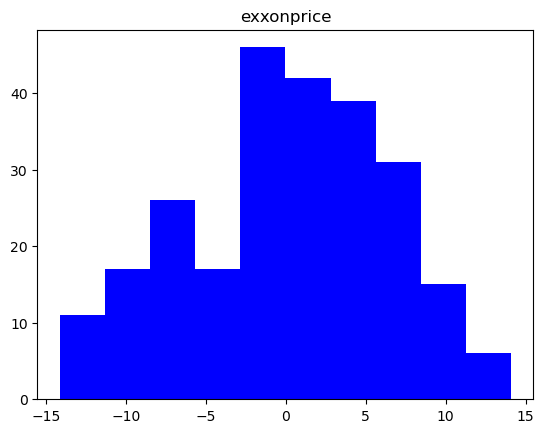

In [34]:
# //plotting the residuals
(Y_test-ypred).hist(grid=False,color="blue")

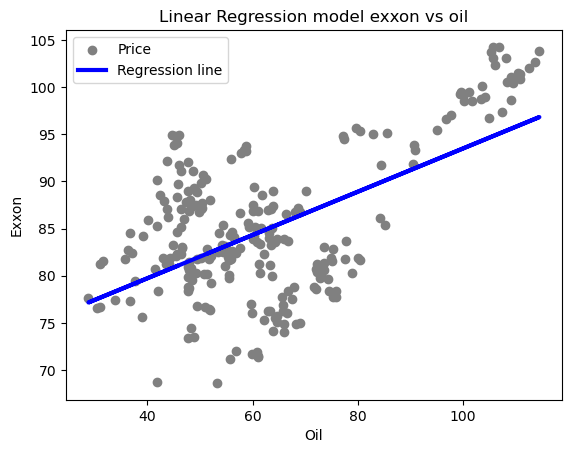

In [38]:
plt.scatter(X_test,Y_test,color="grey",label="Price")
plt.plot(X_test,ypred,color="blue",linewidth=3,linestyle="-",label="Regression line")
plt.title("Linear Regression model exxon vs oil")
plt.xlabel("Oil")
plt.ylabel("Exxon")
plt.legend()
plt.show()

In [39]:
# //save the mdoel
import pickle
# //pikle the model
with open("my_linear_regression.sav","wb") as f:
    pickle.dump(lrmodel,f)
# load back the model
with open("my_linear_regression.sav","rb") as f:
    lrmodel2=pickle.load(f)

# //making new predictions
lrmodel2.predict([[67]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[85.92224922]])